In [1]:
import numpy as np

In [2]:
# naive RNN implementation
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.asarray(successive_outputs)

In [3]:
final_output_sequence.shape

(100, 64)

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [5]:
# preparing the imdb data
max_features = 10000
maxlen = 500

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = keras.preprocessing.sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = keras.preprocessing.sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
# training the model with Embedding and SimpleRNN layers
model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.SimpleRNN(32))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

batch_size = 64
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.6859 - binary_accuracy: 0.5486 - val_loss: 0.6682 - val_binary_accuracy: 0.5916
Epoch 2/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.6266 - binary_accuracy: 0.6438 - val_loss: 0.7715 - val_binary_accuracy: 0.5424
Epoch 3/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.5592 - binary_accuracy: 0.7124 - val_loss: 0.5539 - val_binary_accuracy: 0.7190
Epoch 4/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.5002 - binary_accuracy: 0.7621 - val_loss: 0.6442 - val_binary_accuracy: 0.6732
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.4685 - binary_accuracy: 0.7846 - val_loss: 0.4839 - val_binary_accuracy: 0.7718
Epoch 6/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.4322 - binary_accuracy: 0.8076 - val_loss: 0.4377 - val_binary_ac

In [7]:
import matplotlib.pyplot as plt

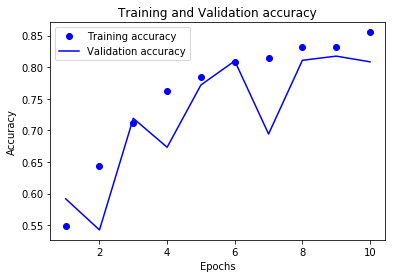

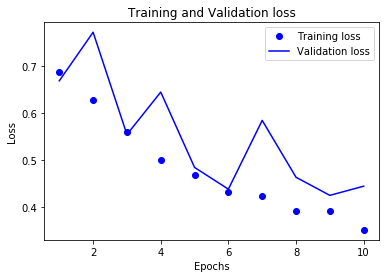

In [8]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.binary_crossentropy,
              metrics=[keras.metrics.binary_accuracy])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 354s 18ms/step - loss: 0.6626 - binary_accuracy: 0.5884 - val_loss: 0.5835 - val_binary_accuracy: 0.6940
Epoch 2/10
20000/20000 [==============================] - 351s 18ms/step - loss: 0.5408 - binary_accuracy: 0.7303 - val_loss: 0.4740 - val_binary_accuracy: 0.7772
Epoch 3/10
20000/20000 [==============================] - 349s 17ms/step - loss: 0.4474 - binary_accuracy: 0.8007 - val_loss: 0.4127 - val_binary_accuracy: 0.8202
Epoch 4/10
20000/20000 [==============================] - 351s 18ms/step - loss: 0.3897 - binary_accuracy: 0.8324 - val_loss: 0.3592 - val_binary_accuracy: 0.8456
Epoch 5/10
20000/20000 [==============================] - 350s 18ms/step - loss: 0.3450 - binary_accuracy: 0.8568 - val_loss: 0.3816 - val_binary_accuracy: 0.8308
Epoch 6/10
20000/20000 [==============================] - 348s 17ms/step - loss: 0.2990 - binary_accuracy: 0.8758 - val_loss: 0.3294 - v

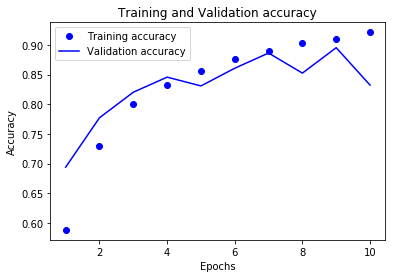

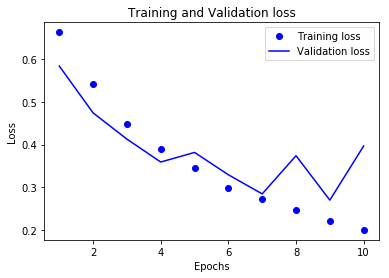

In [11]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()